In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline

In [2]:
X = np.array([
    [0, 0],
    [-1, 0],
    [1, 0],
    [0, 1],
    [0, -1],
    [-2, 0],
    [2, 0],
    [0, -2],
    [0, 2]
])
y = np.array([1, 1, 1, 1, 1, -1, -1, -1, -1])

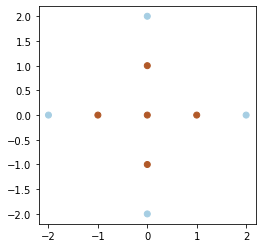

In [3]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cm.Paired)
plt.gca().set_aspect('equal')

In [4]:
z = np.zeros((len(X), len(X)))
for i in range(len(X)):
    for j in range(len(X)):
        z[i, j] = np.exp(np.linalg.norm(X[i] - X[j]))

<AxesSubplot:>

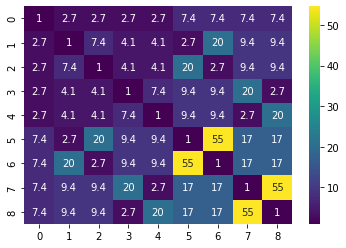

In [5]:
import seaborn as sns
sns.heatmap(z, annot=True, cmap=cm.viridis)

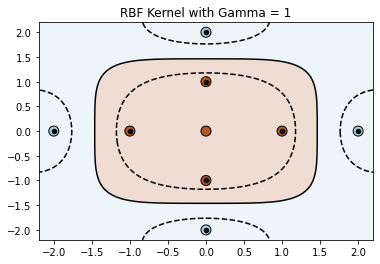

In [6]:
from sklearn import svm
X_train = X
y_train = y
kernel = 'rbf'
for fig_num, gamma in enumerate([1]):
    clf = svm.SVC(kernel=kernel, gamma=gamma)
    clf.fit(X_train, y_train)

    plt.figure(fig_num)
    plt.clf()
    plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired,
                edgecolor='k', s=100)


    plt.axis('tight')
    x_min = X[:, 0].min()-1
    x_max = X[:, 0].max()+1
    y_min = X[:, 1].min()-1
    y_max = X[:, 1].max()+1

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired, alpha=0.2)

    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],
                linestyles=['--', '-', '--'], levels=[-0.5, 0, 0.5])

    plt.title("RBF Kernel with Gamma = {}".format(gamma))
    svs = clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1],  zorder=20, cmap=plt.cm.Paired,c='k',
                edgecolor='k', s=20)

Let us now understand how the gamma parameter works. For that, we will look at a different dataset

In [7]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target

X = X[y != 0, :2]
y = y[y != 0]

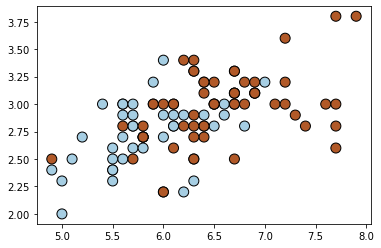

In [8]:
plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired,
                edgecolor='k', s=100)

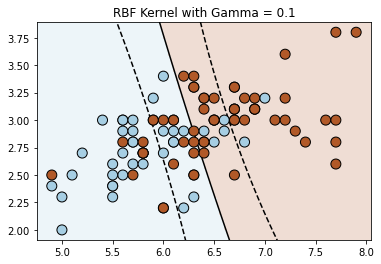

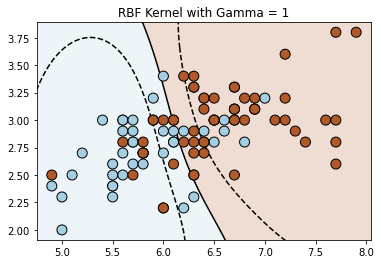

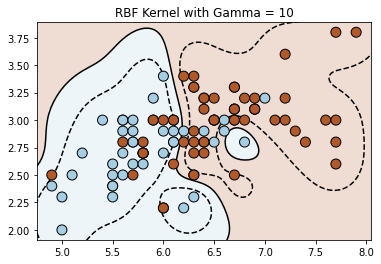

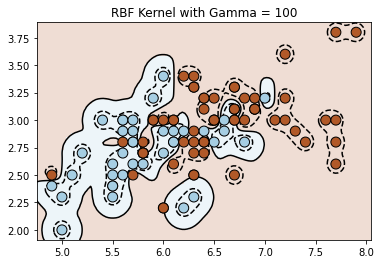

In [9]:
from sklearn import svm
X_train = X
y_train = y
kernel = 'rbf'
for fig_num, gamma in enumerate([0.1, 1, 10, 100]):
    clf = svm.SVC(kernel=kernel, gamma=gamma)
    clf.fit(X_train, y_train)

    plt.figure(fig_num)
    plt.clf()
    plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired,
                edgecolor='k', s=100)


    plt.axis('tight')
    x_min = X[:, 0].min()-1
    x_max = X[:, 0].max()+1
    y_min = X[:, 1].min()-1
    y_max = X[:, 1].max()+1

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired, alpha=0.2)

    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],
                linestyles=['--', '-', '--'], levels=[-.5, 0, .5])

    plt.title("RBF Kernel with Gamma = {}".format(gamma))
    svs = clf.support_vectors_
    #plt.scatter(svs[:, 0], svs[:, 1],  zorder=20, cmap=plt.cm.Paired,c='k',
    #           edgecolor='k', s=20)